# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import mpld3
from scipy.stats import linregress
from urllib.request import urlretrieve
from urllib.parse import urlencode
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [347]:
#generate random list for latitudes and longitudes 

latitude = []
longitude = []
max_num=500
for each_lat in np.random.randint(-90,90,max_num):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,max_num):
    longitude.append(each_lon)
    

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [348]:
latitude_and_Longitude = tuple(zip(latitude,longitude))
latitude_and_Longitude

((-60, 24),
 (-19, -118),
 (41, -78),
 (59, -1),
 (-41, -84),
 (-33, -150),
 (-87, -30),
 (-66, 81),
 (-47, -85),
 (-14, 24),
 (-64, -64),
 (-38, -158),
 (-10, 41),
 (19, 105),
 (25, -162),
 (-49, -128),
 (-75, -58),
 (-26, -149),
 (-65, 125),
 (21, 46),
 (45, 41),
 (-64, -7),
 (63, 55),
 (14, 162),
 (-68, 91),
 (-81, 19),
 (36, -4),
 (-67, 31),
 (35, 103),
 (10, 119),
 (65, -33),
 (75, -101),
 (-33, 146),
 (-7, 164),
 (76, 34),
 (46, -169),
 (-58, 49),
 (72, -87),
 (-80, 91),
 (-67, -1),
 (53, 162),
 (-3, -135),
 (-65, -30),
 (2, -71),
 (-16, -77),
 (-44, -12),
 (70, -8),
 (61, 93),
 (-25, -92),
 (23, 50),
 (-13, 60),
 (-87, 173),
 (38, -98),
 (-84, -166),
 (-38, -16),
 (-88, -154),
 (-14, 164),
 (59, -158),
 (-83, 110),
 (-13, 170),
 (-15, -159),
 (-14, 16),
 (-47, -4),
 (-70, -62),
 (-60, -34),
 (-54, 173),
 (13, -41),
 (-83, -41),
 (-45, 152),
 (-33, -112),
 (6, -7),
 (-77, 12),
 (-80, -91),
 (-67, -140),
 (34, 83),
 (-9, 83),
 (45, 66),
 (31, 109),
 (62, -122),
 (58, 83),
 (70, -1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [349]:
cities = []
country = []

for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)
    
print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))

The above script has generated 278 different cities using random numbers.


In [350]:
#create a dataframe to store all the cities and countries generated with citipy

df_countriesf_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

#add additional blank columns to store information from openweathermap api

df_countriesf_countries['Latitude'] = ''
df_countriesf_countries['Longitude'] = ''
df_countriesf_countries['Temperature (F)'] = ''
df_countriesf_countries['Humidity (%)'] = ''
df_countriesf_countries['Cloudiness (%)'] = ''
df_countriesf_countries['Wind Speed (mph)'] = ''
df_countriesf_countries['returncode'] = ''
df_countriesf_countries['Max Temp (F)'] = ''


#df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')
df_countriesf_countries.head()


,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),returncode,Max Temp (F)
0,bredasdorp,za,,,,,,,,
1,rikitea,pf,,,,,,,,
2,state college,us,,,,,,,,
3,sandwick,gb,,,,,,,,
4,ancud,cl,,,,,,,,


In [416]:
api_key = "8bb4902534e8ff56223facbbe3b7bb1f"


apikey = '8bb4902534e8ff56223facbbe3b7bb1f'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
#df_countriesf_countries['latitude'] = ""
#df_countriesf_countries['temperature'] = ""
#df_countriesf_countries['humidity'] = ""
#df_countriesf_countries['cloudiness'] = ""
#df_countriesf_countries['wind_speed'] = ""
df_countriesf_countries['returncode'] = ""
#df_countriesf_countries['Longitude'] = ""
for index,row in df_countriesf_countries.iterrows():
    count += 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['Cities']
    
    #print(f"{query_url}\n{count} index {index} ")
    try:
        weather_response = requests.get(query_url)
        cityweather = weather_response.json()
        #print(f"hi there {query_url}")
        #if count < 5 : 
        #print(f" ha ha {cityweather}")
        #df_countriesf_countries
        retCode=weather_response.status_code
        #print()
        #print(f" this is it {retCode}")
        df_countriesf_countries['returncode'][index] = str(retCode)
        if int(retCode) == 200: 
            df_countriesf_countries['Latitude'][index] = cityweather['coord']['lat']
            df_countriesf_countries['Longitude'][index] = cityweather['coord']['lon']
            df_countriesf_countries['Temperature (F)'][index] = cityweather['main']['temp']
            df_countriesf_countries['Humidity (%)'][index] = cityweather['main']['humidity']
            df_countriesf_countries['Cloudiness (%)'][index] = cityweather['clouds']['all']
            df_countriesf_countries['Wind Speed (mph)'][index] = cityweather['wind']['speed']
            df_countriesf_countries['Max Temp (F)'][index] = cityweather['main']['temp_max']

        else:
            print(f" {retCode} is not 200 ")
        
    except requests.exceptions.HTTPError as e:
        print(f"No data for this city: {row['city']} returned code {e}")
df_countriesf_countries.head()

 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 
 404 is not 200 


,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),returncode,Max Temp (F)
0,bredasdorp,za,-34.53,20.04,53.6,76,2,85.23,200,53.6
1,rikitea,pf,-23.12,-134.97,77.95,78,45,17.87,200,77.95
2,state college,us,40.79,-77.86,59.23,38,40,8.05,200,62.01
3,sandwick,gb,60,-1.25,37.4,55,91,14.99,200,37.4
4,ancud,cl,-41.87,-73.82,50,87,20,3.36,200,50


In [354]:
#df = df.drop(df[(df.score < 50) & (df.score > 20)].index)
#df_countriesf_countries = df_countriesf_countries.drop(df_countriesf_countries[df_countriesf_countries.returncode != "200"].index)
df_filterd=df_countriesf_countries[df_countriesf_countries['returncode'] == '200']
#df_countriesf_countries.head()
df_filterd.head()
df_filterd.count()

Cities              461
Country             461
Latitude            461
Longitude           461
Temperature (F)     461
Humidity (%)        461
Cloudiness (%)      461
Wind Speed (mph)    461
returncode          461
Max Temp (F)        461
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Today's date: 2020-04-12


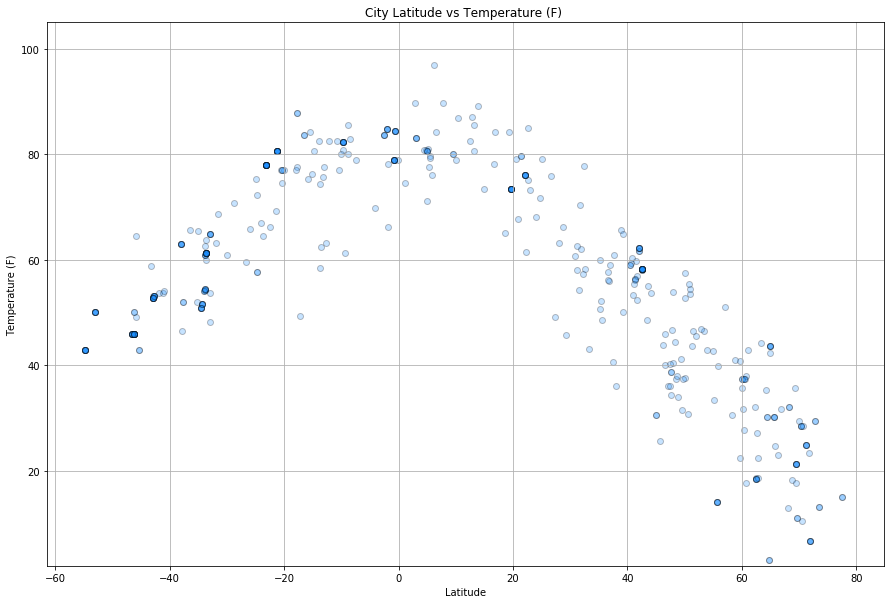

In [402]:
#plt.clf()
from datetime import date

today = date.today()
print("Today's date:", today)
def my_plot(my_x,my_y,mydf):
    plt.figure(figsize=(15,10))

#########

# just change the colun names from dataframe you can reuse the plot code for other fields from df_filterd
    #x_one="Latitude"
    #y_one="Temperature (F)"
    x_one=my_x
    y_one=my_y
    ########## 
    scatter=plt.scatter(mydf[x_one], mydf[y_one], color='dodgerblue',edgecolor='black', alpha=0.25)

    plt.ylim(2,105)
    plt.grid()
    plt.xlabel(x_one)
    plt.ylabel(y_one)
    plt.title(f'City {x_one} vs {y_one} ')
    plt.savefig(f"../Images/{x_one}_vs_{y_one}.png")
    plt.show()
my_plot("Latitude","Temperature (F)",df_filterd)

#### Latitude vs. Humidity Plot

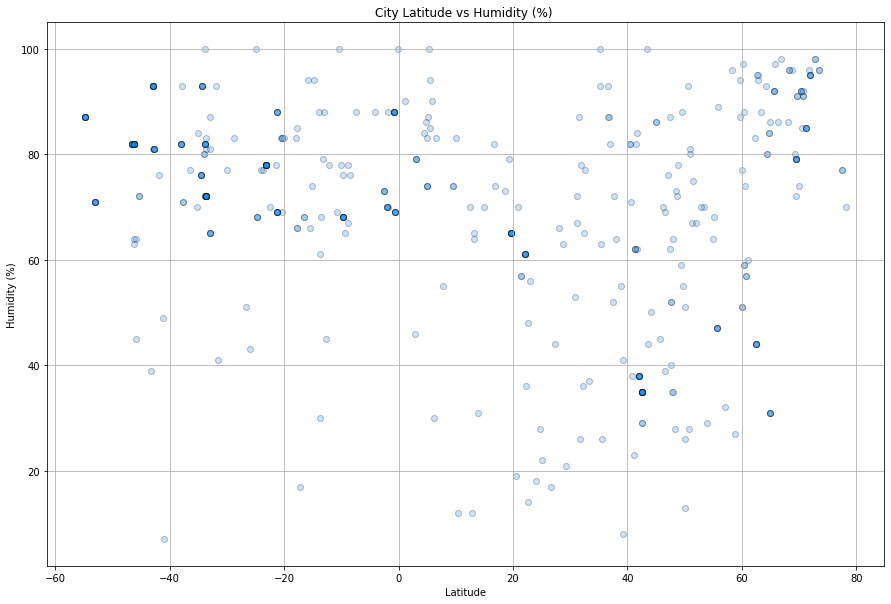

In [403]:
my_plot("Latitude","Humidity (%)",df_filterd)

#### Latitude vs. Cloudiness Plot

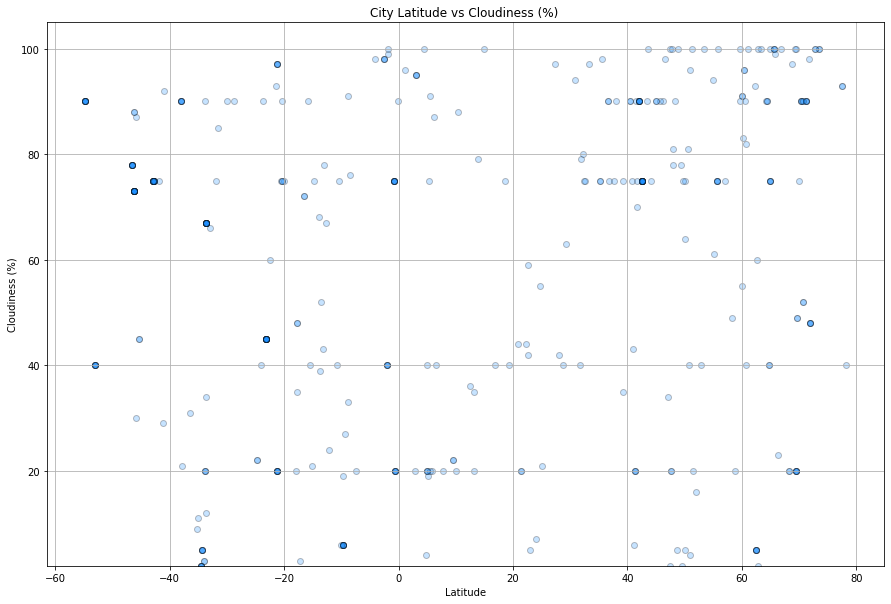

In [404]:
my_plot("Latitude","Cloudiness (%)",df_filterd)

#### Latitude vs. Wind Speed Plot

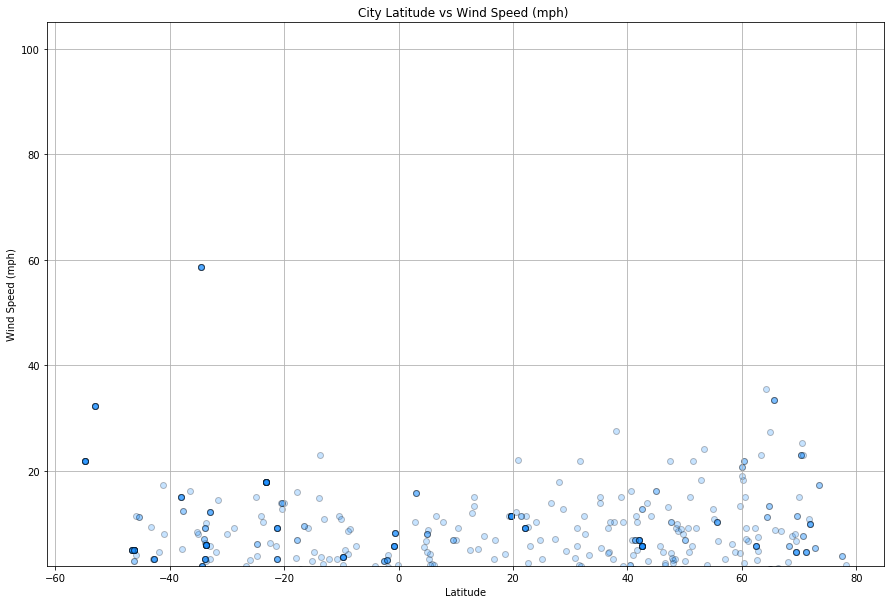

In [405]:
my_plot("Latitude","Wind Speed (mph)",df_filterd)

## Linear Regression

In [423]:
# OPTIONAL: Create a function to create Linear Regression plots
def regress_for_me_plese(my_x, my_y,mypd):
    plt.figure(figsize=(15,10))

    x_values = pd.to_numeric(mypd[my_x]).astype(float)
    y_values = pd.to_numeric(mypd[my_y]).astype(float)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"Regression line equation is: {line_eq}")
    #fig, ax = plt.subplots(nrows=1, figsize=(10,5))
    plt.ylim(2,105)
    #plt.figure(figsize=(15,10))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    #plt.annotate(f"{line_eq}",xy=(20,20), fontsize=20,color="red")
    print(min(mypd[my_x]))
    print(mypd.name)
    #print(mypd[0])
    plt.annotate(f"{line_eq}",xy=(min(mypd[my_x])+10,min(mypd[my_y])+10),fontsize=15,color="red")
    plt.xlabel(f"{my_x}")
    plt.ylabel(f"{my_y}")
    plt.title(f"{my_x} v/s {my_y} {today} linear regression",fontsize=20)
    print(f"The r-squared is: {rvalue}")
    print(f"The regression displays a {'negative' if rvalue < 0 else 'positive'} correlation.")
    print(f"In the {mypd.name}, as you move away from the equator the '{my_y}' {'decreases' if rvalue < 0 else 'increase'} .")
    
    plt.grid()
    plt.title(f'Linear regression City {my_x} vs {my_y} ')
    plt.savefig(f"../Images/{mypd.name}_regression_{my_x}_vs_{my_y}.png")
    plt.show()

In [424]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern and Southern Hemisphere DataFrames
northern_df = df_filterd.loc[pd.to_numeric(df_filterd["Latitude"]).astype(float) > 0, :]
northern_df.name = "Northern_Hemisphere"

southern_df = df_filterd.loc[pd.to_numeric(df_filterd["Latitude"]).astype(float) < 0, :]
southern_df.name = "Southern_Hemisphere"

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.04x + 95.69
1.2
Northern_Hemisphere
The r-squared is: -0.9062337703224757
The regression displays a negative correlation.
In the Northern_Hemisphere, as you move away from the equator the 'Max Temp (F)' decreases .


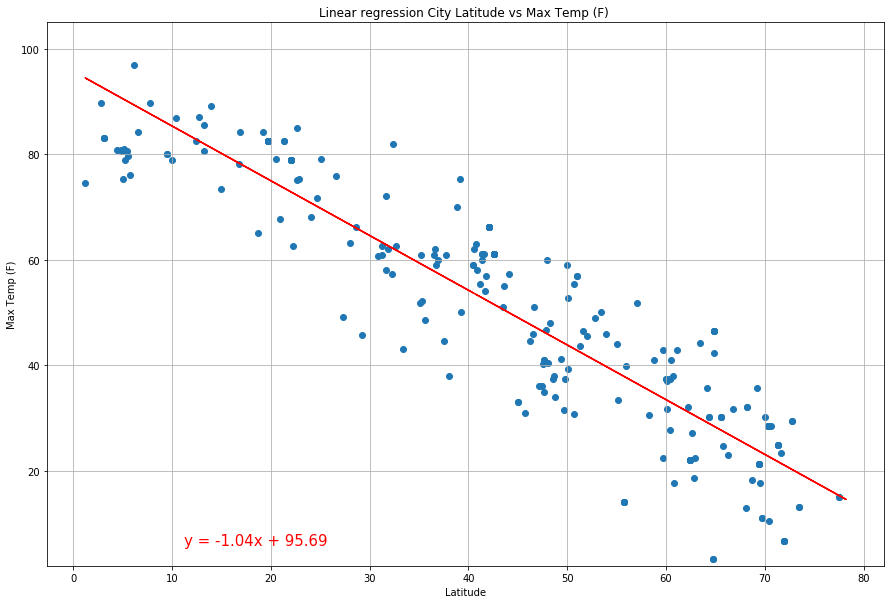

In [427]:

regress_for_me_plese("Latitude","Max Temp (F)",northern_df)
#regress_for_me_plese("Latitude","Max Temp (F)",southern_df)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.79x + 87.4
-54.8
Southern_Hemisphere
The r-squared is: 0.8846319354878632
The regression displays a positive correlation.
In the Southern_Hemisphere, as you move away from the equator the 'Max Temp (F)' increase .


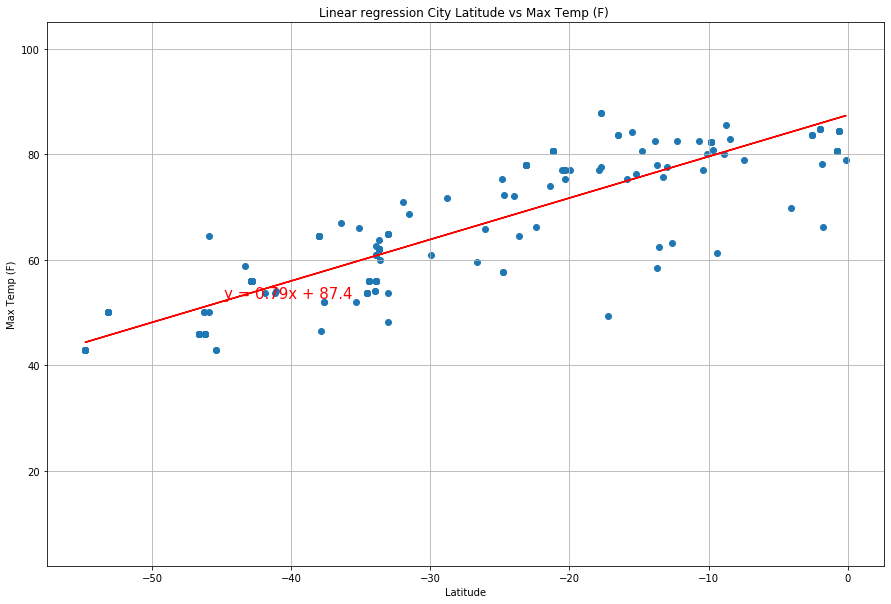

In [428]:
regress_for_me_plese("Latitude","Max Temp (F)",southern_df)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.26x + 52.85
1.2
Northern_Hemisphere
The r-squared is: 0.2286379313890621
The regression displays a positive correlation.
In the Northern_Hemisphere, as you move away from the equator the 'Humidity (%)' increase .


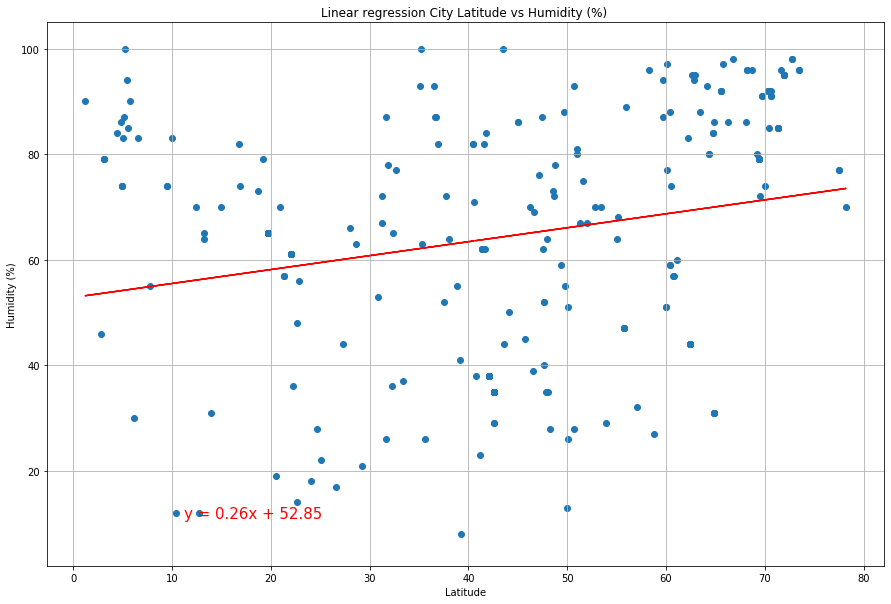

In [429]:
regress_for_me_plese("Latitude","Humidity (%)",northern_df)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.09x + 73.98
-54.8
Southern_Hemisphere
The r-squared is: -0.11608918479640307
The regression displays a negative correlation.
In the Southern_Hemisphere, as you move away from the equator the 'Humidity (%)' decreases .


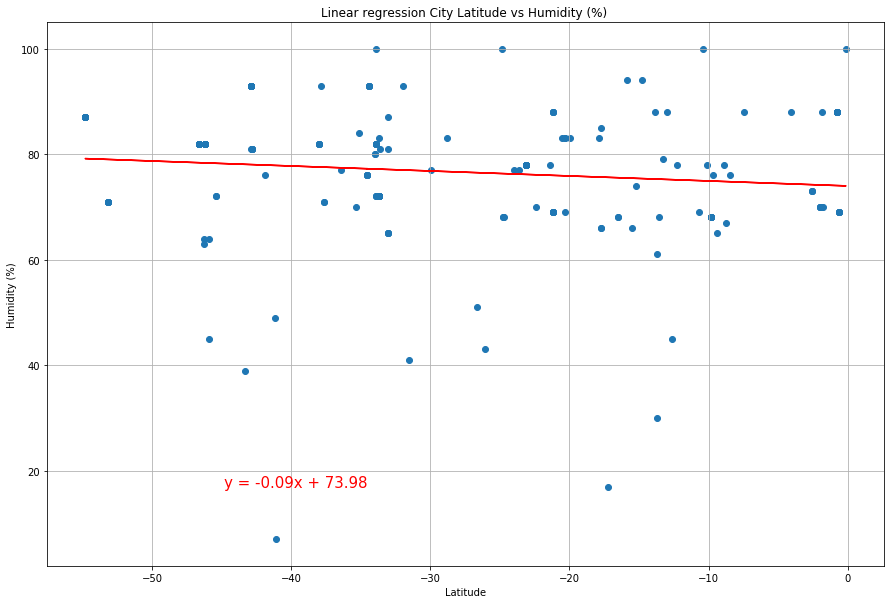

In [430]:
regress_for_me_plese("Latitude","Humidity (%)",southern_df)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.55x + 31.52
1.2
Northern_Hemisphere
The r-squared is: 0.3106057672639096
The regression displays a positive correlation.
In the Northern_Hemisphere, as you move away from the equator the 'Cloudiness (%)' increase .


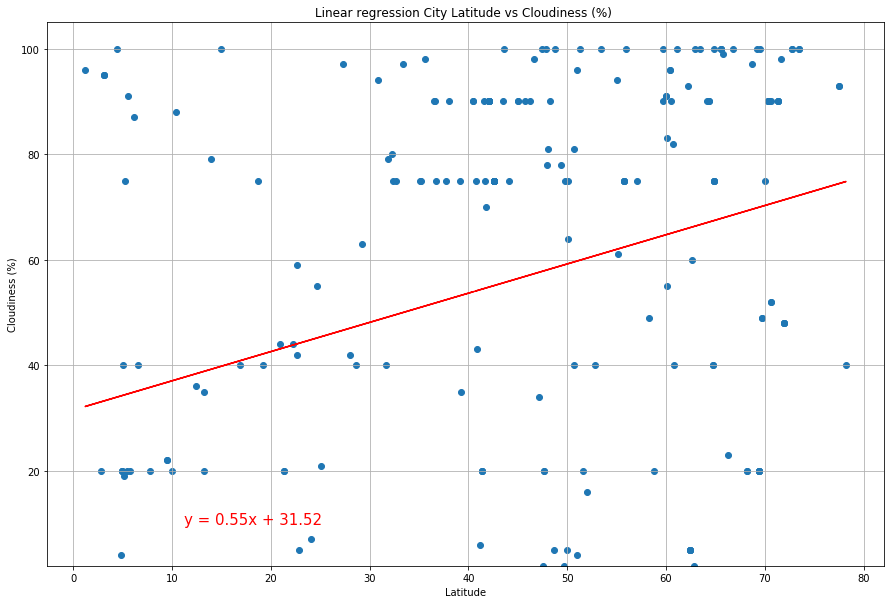

In [431]:
regress_for_me_plese("Latitude","Cloudiness (%)",northern_df)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.33x + 41.46
-54.8
Southern_Hemisphere
The r-squared is: -0.15756801385438673
The regression displays a negative correlation.
In the Southern_Hemisphere, as you move away from the equator the 'Cloudiness (%)' decreases .


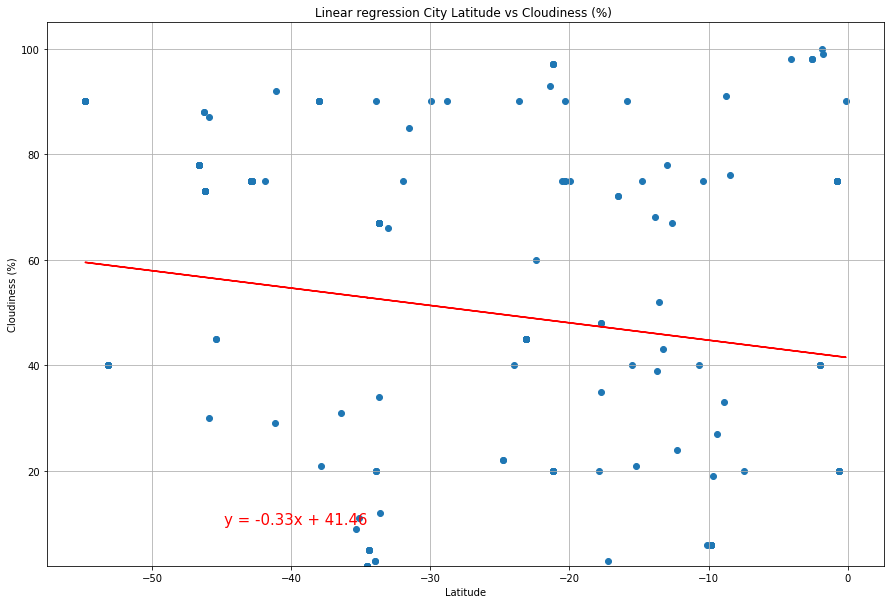

In [432]:
regress_for_me_plese("Latitude","Cloudiness (%)",southern_df)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 7.55
1.2
Northern_Hemisphere
The r-squared is: 0.12365884340691449
The regression displays a positive correlation.
In the Northern_Hemisphere, as you move away from the equator the 'Wind Speed (mph)' increase .


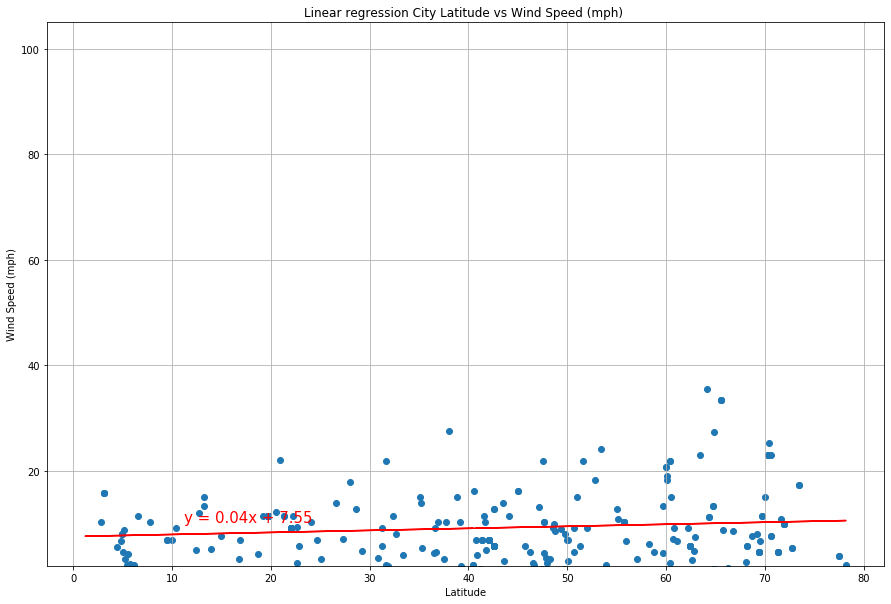

In [433]:
regress_for_me_plese("Latitude","Wind Speed (mph)",northern_df)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.15x + 5.25
-54.8
Southern_Hemisphere
The r-squared is: -0.22837673180885074
The regression displays a negative correlation.
In the Southern_Hemisphere, as you move away from the equator the 'Wind Speed (mph)' decreases .


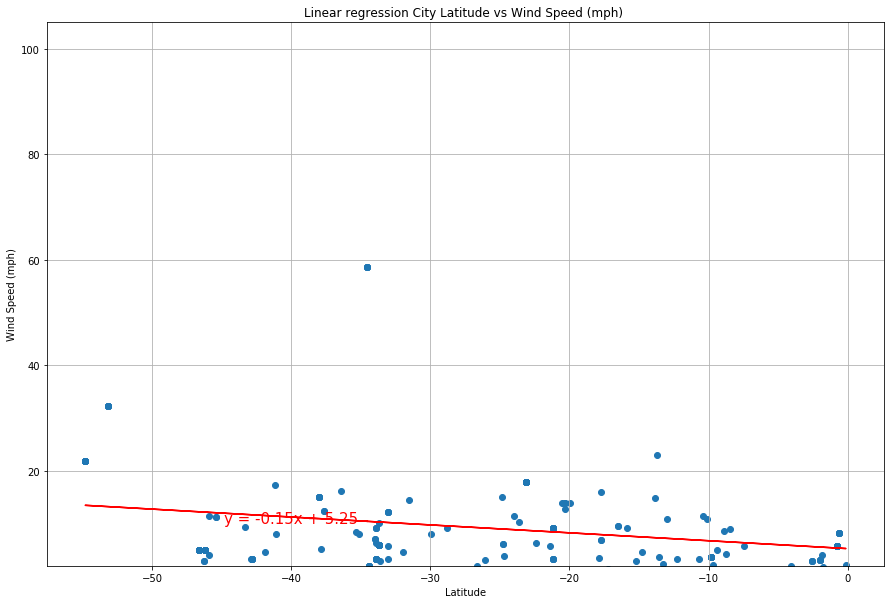

In [434]:
regress_for_me_plese("Latitude","Wind Speed (mph)",southern_df)